In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.layers import Normalization, Dense, InputLayer
from tensorflow.keras.losses import Huber, SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
from tensorflow.keras.optimizers import Adam

In [ ]:
por_data = pd.read_csv('/content/student-por.csv', sep=';')
por_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
mat_data = pd.read_csv('/content/student-mat.csv', sep=';')
mat_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [ ]:
data = pd.concat([por_data, mat_data], axis=0)
data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [ ]:
data = data.rename(columns={
    'famsize':'family_size',
    'Pstatus':'parent_cohabitation_status',
    'Medu':'mother_education',
    'Fedu':'father_education',
    'Mjob':'mother_occupation',
    'Fjob':'father_occupation',
    'reason':'reason_for_choose_school',
    'failures':'classes_failed',
    'schoolsup':'extra_edu_support',
    'famsup':'family_edu_support',
    'paid':'extra_paid_classes',
    'activities':'extracurriculars',
    'nursery':'attended_nursery',
    'higher':'wants_higher_edu',
    'internet':'internet_access',
    'famrel':'quality_of_family_relationships',
    'freetime':'free_time',
    'goout':'hangs_out_with_friends',
    'Dalc':'workday_alcohol_consumption',
    'Walc':'weekend_alcohol_consumption',
    'health':'health_status',
    'absences':'number_of_absences',
})
data.head()

,school,sex,age,address,family_size,parent_cohabitation_status,mother_education,father_education,mother_occupation,father_occupation,...,quality_of_family_relationships,free_time,hangs_out_with_friends,workday_alcohol_consumption,weekend_alcohol_consumption,health_status,number_of_absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


Categorical Binary:
- school, sex, address, family_size, parent_cohabitation_status, extra_edu_support, family_edu_support, extra_paid_classes, extracurriculars, attended_nursery, wants_higher_edu, internet_access, romantic

Categorical Nominal:
- mother_occupation, father_occupation, reason_for_choose_school, guardian

In [ ]:
label_encoder = LabelEncoder()

columns_to_label_encode = ['mother_occupation','father_occupation',
                           'reason_for_choose_school','guardian']

for col in columns_to_label_encode:
  data[col] = label_encoder.fit_transform(data[col])

data[columns_to_label_encode]

,mother_occupation,father_occupation,reason_for_choose_school,guardian
0,0,4,0,1
1,0,2,0,0
2,0,2,2,1
3,1,3,1,1
4,2,2,1,0
...,...,...,...,...
390,3,3,0,2
391,3,3,0,1
392,2,2,0,2
393,3,2,0,1


In [ ]:
one_hot_encoder = OneHotEncoder(sparse_output=False)

columns_to_encode = ['school', 'sex', 'address', 'family_size',
                     'parent_cohabitation_status', 'extra_edu_support',
                     'family_edu_support', 'extra_paid_classes',
                     'extracurriculars', 'attended_nursery',
                     'wants_higher_edu', 'internet_access',
                     'romantic']

for col in columns_to_encode:
  encoded_array = one_hot_encoder.fit_transform(data[[col]])
  feature = one_hot_encoder.get_feature_names_out([col])
  encoded_df = pd.DataFrame(encoded_array, columns=feature)
  encoded_df.reset_index(drop=True, inplace=True)
  data.reset_index(drop=True, inplace=True)
  data = pd.concat([data, encoded_df], axis=1)

data = data.drop(columns=columns_to_encode)
data.head()

,age,mother_education,father_education,mother_occupation,father_occupation,reason_for_choose_school,guardian,traveltime,studytime,classes_failed,...,extracurriculars_no,extracurriculars_yes,attended_nursery_no,attended_nursery_yes,wants_higher_edu_no,wants_higher_edu_yes,internet_access_no,internet_access_yes,romantic_no,romantic_yes
0,18,4,4,0,4,0,1,2,2,0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
1,17,1,1,0,2,0,0,1,2,0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
2,15,1,1,0,2,2,1,1,2,0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
3,15,4,2,1,3,1,1,1,3,0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
4,16,3,3,2,2,1,0,1,2,0,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0


In [ ]:
tensor_data = tf.constant(data)
tensor_data = tf.cast(tensor_data, tf.float32)
tensor_data = tf.random.shuffle(tensor_data)
print(tensor_data)

tf.Tensor(
[[16.  2.  3. ...  1.  1.  0.]
 [15.  2.  2. ...  1.  1.  0.]
 [15.  2.  2. ...  1.  1.  0.]
 ...
 [15.  2.  2. ...  0.  1.  0.]
 [17.  1.  1. ...  1.  0.  1.]
 [17.  4.  3. ...  1.  0.  1.]], shape=(1044, 46), dtype=float32)


In [ ]:
X = tensor_data[:,0:-1]
y = tensor_data[:,-1]
y = tf.expand_dims(y, axis=1)
print(X)
print(y)

tf.Tensor(
[[16.  2.  3. ...  0.  1.  1.]
 [15.  2.  2. ...  0.  1.  1.]
 [15.  2.  2. ...  0.  1.  1.]
 ...
 [15.  2.  2. ...  1.  0.  1.]
 [17.  1.  1. ...  0.  1.  0.]
 [17.  4.  3. ...  0.  1.  0.]], shape=(1044, 45), dtype=float32)
tf.Tensor(
[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [1.]
 [1.]], shape=(1044, 1), dtype=float32)


In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [ ]:
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(835, 45)
(835, 1)


In [ ]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=8, reshuffle_each_iteration=True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
X_val = X[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]
y_val = y[int(DATASET_SIZE*TRAIN_RATIO):int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO))]

In [ ]:
val_dataset = tf.data.Dataset.from_tensor_slices((X_val, y_val))
val_dataset = val_dataset.batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
X_test = X[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]
y_test = y[int(DATASET_SIZE*(TRAIN_RATIO+VAL_RATIO)):]

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
test_dataset = train_dataset.shuffle(buffer_size = 8, reshuffle_each_iteration = True).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X_train)

<tf.Tensor: shape=(835, 45), dtype=float32, numpy=
array([[-0.5557854 , -0.5543527 ,  0.5679464 , ..., -0.5093377 ,
         0.50933784,  0.71793354],
       [-1.3545475 , -0.5543527 , -0.34055015, ..., -0.5093377 ,
         0.50933784,  0.71793354],
       [-1.3545475 , -0.5543527 , -0.34055015, ..., -0.5093377 ,
         0.50933784,  0.71793354],
       ...,
       [ 0.24297673, -1.4549062 , -1.2490467 , ..., -0.5093377 ,
         0.50933784,  0.71793354],
       [ 0.24297673, -1.4549062 , -1.2490467 , ...,  1.9633193 ,
        -1.9633193 ,  0.71793354],
       [-1.3545475 , -0.5543527 ,  0.5679464 , ...,  1.9633193 ,
        -1.9633193 ,  0.71793354]], dtype=float32)>

In [ ]:
model = tf.keras.Sequential([
    InputLayer(input_shape=(45,)),
    normalizer,
    Dense(45, activation='relu'),
    Dense(21, activation='softmax')
])
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 45)                  │              91 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 45)                  │           2,070 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 21)                  │             966 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,127 (12.22 KB)

 Trainable params: 3,036 (11.86 KB)

 Non-trainable params: 91 (368.00 B)

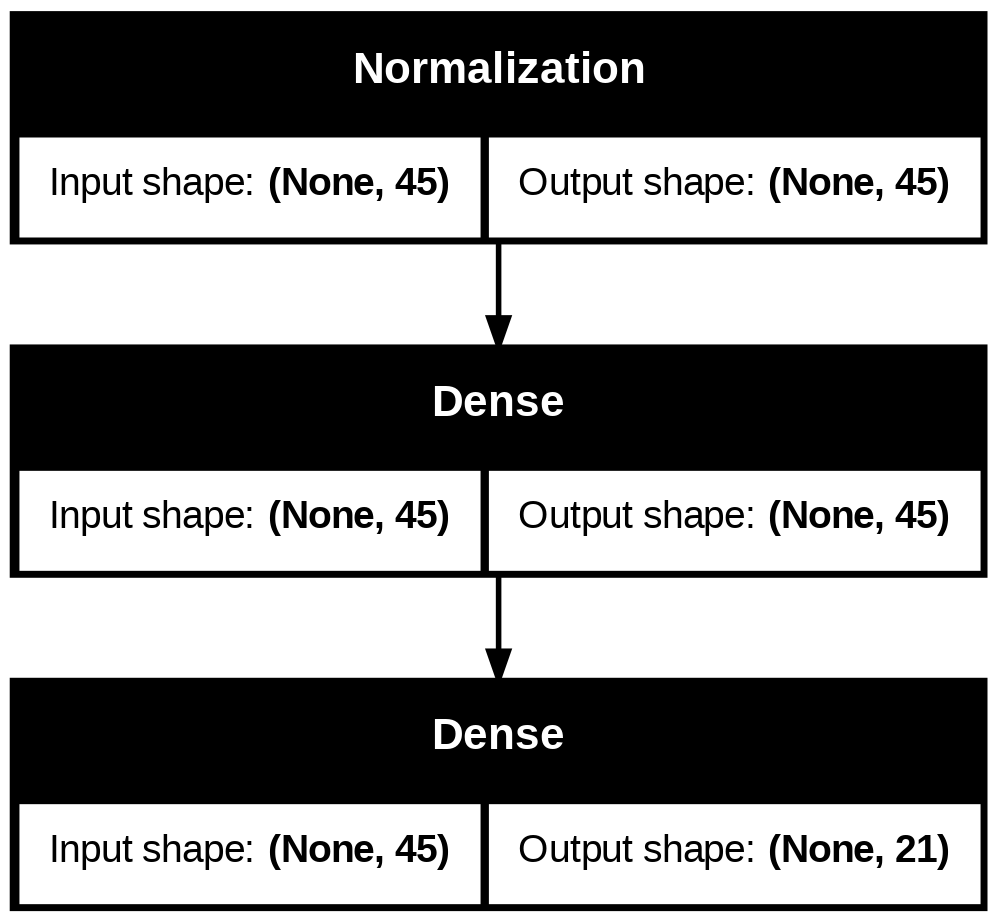

In [ ]:
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.1),
              loss=SparseCategoricalCrossentropy(),
              metrics=[SparseCategoricalAccuracy()])

In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=100, verbose=1)
# model.fit() returns a History object that provides a detailed
# record of the training process

Epoch 1/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.9859 - sparse_categorical_accuracy: 0.7032 - val_loss: 0.1701 - val_sparse_categorical_accuracy: 0.9615
Epoch 2/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0716 - sparse_categorical_accuracy: 0.9868 - val_loss: 4.4863e-04 - val_sparse_categorical_accuracy: 1.0000
Epoch 3/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2840 - sparse_categorical_accuracy: 0.9799 - val_loss: 0.1526 - val_sparse_categorical_accuracy: 0.9904
Epoch 4/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0903 - sparse_categorical_accuracy: 0.9867 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 1.0000
Epoch 5/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0206 - sparse_categorical_accuracy: 0.9980 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 1.0000
Epoch 6/100
27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1117 - sparse_categorical_accuracy: 0.9950 - val_loss: 0.0000e+00 - val_sparse_categorical_accuracy: 1

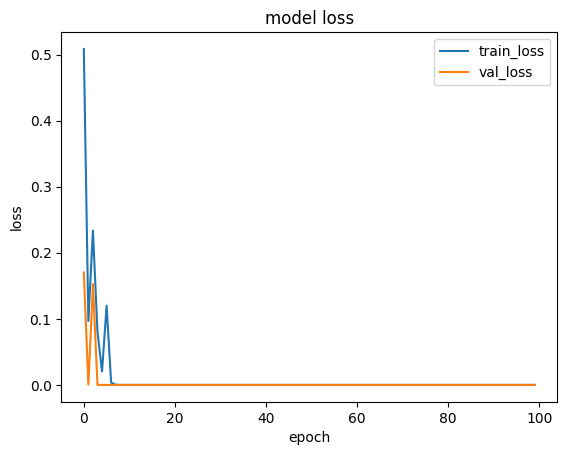

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train_loss', 'val_loss'])
plt.show()

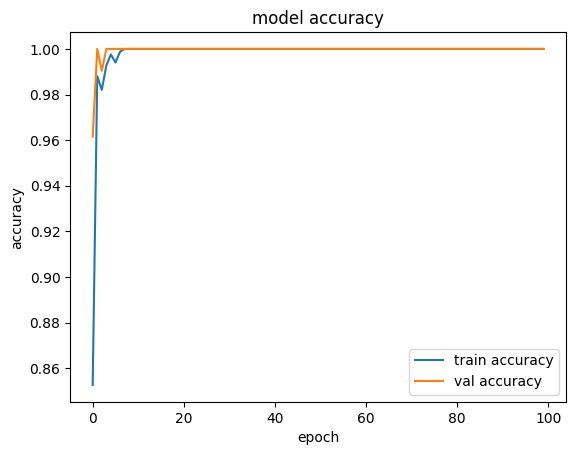

In [ ]:
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'val accuracy'])
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.2890 - sparse_categorical_accuracy: 0.9847 


[0.18025903403759003, 0.9904761910438538]

In [ ]:
model.predict(tf.expand_dims(X_test[0], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
# Get the predicted class index from the one-hot encoded output
predicted_class = tf.argmax(model.predict(tf.expand_dims(X_test[3], axis=0)), axis=1).numpy()[0]

# Get the actual class label for the same test sample
actual_class = y_test[3].numpy()

# Print the predicted and actual class labels
print(f"Predicted class: {predicted_class}")
print(f"Actual class: {actual_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
Predicted class: 0
Actual class: [0.]


Activation Functions: Choose based on the type of problem

Loss Functions: Select based on the type of prediction task

Metrics: Choose metrics that best reflect the model's performance concerning the problem domain

